In [1]:
import torch
import lightning as pl
from hydra import compose, initialize
import pickle
import hydra
import os
import numpy as np
import pandas as pd

with initialize(version_base=None, config_path="conf"):
    cfg = compose(config_name="config")
# device = 'cuda'
pl.seed_everything(cfg.seed)

val = hydra.utils.instantiate(
    cfg.dataloader.dataset,domain='val'
)
val_loader = torch.utils.data.DataLoader(val, 
                                          batch_size=1,
                                          num_workers=0,
                                          shuffle=True) #as long as we seed the same, will get the same as the batches
# pl_module = hydra.utils.instantiate(
#     cfg.module.module,
#     backbone=hydra.utils.instantiate(cfg.module.backbone),
#     dataset=val_loader.dataset
# ).to(device)


#x = np.stack(val.timestamps)[:,2]
# path = '/gpfsscratch/rech/mlr/udy16au/wandb/ipsl_diffusion/flattened_plev/checkpoints/checkpoint_global_step=100000.ckpt'
# #path = f'{cfg.exp_dir}/checkpoints/checkpoint_global_step=60000.ckpt'
# checkpoint_path = torch.load(path,map_location=torch.device('cuda'))
#checkpoint_path = torch.load(f'epoch=45.ckpt',map_location=torch.device('mps'))
# pl_module.load_state_dict(checkpoint_path['state_dict'])
#inv_map = {v: k for k, v in val.id2pt.items()}
iter_val = iter(val_loader)

[rank: 0] Seed set to 0
56it [00:44,  1.26it/s]


In [2]:
batch=next(iter_val)

In [3]:
batch['state_surface'].shape[1]

34

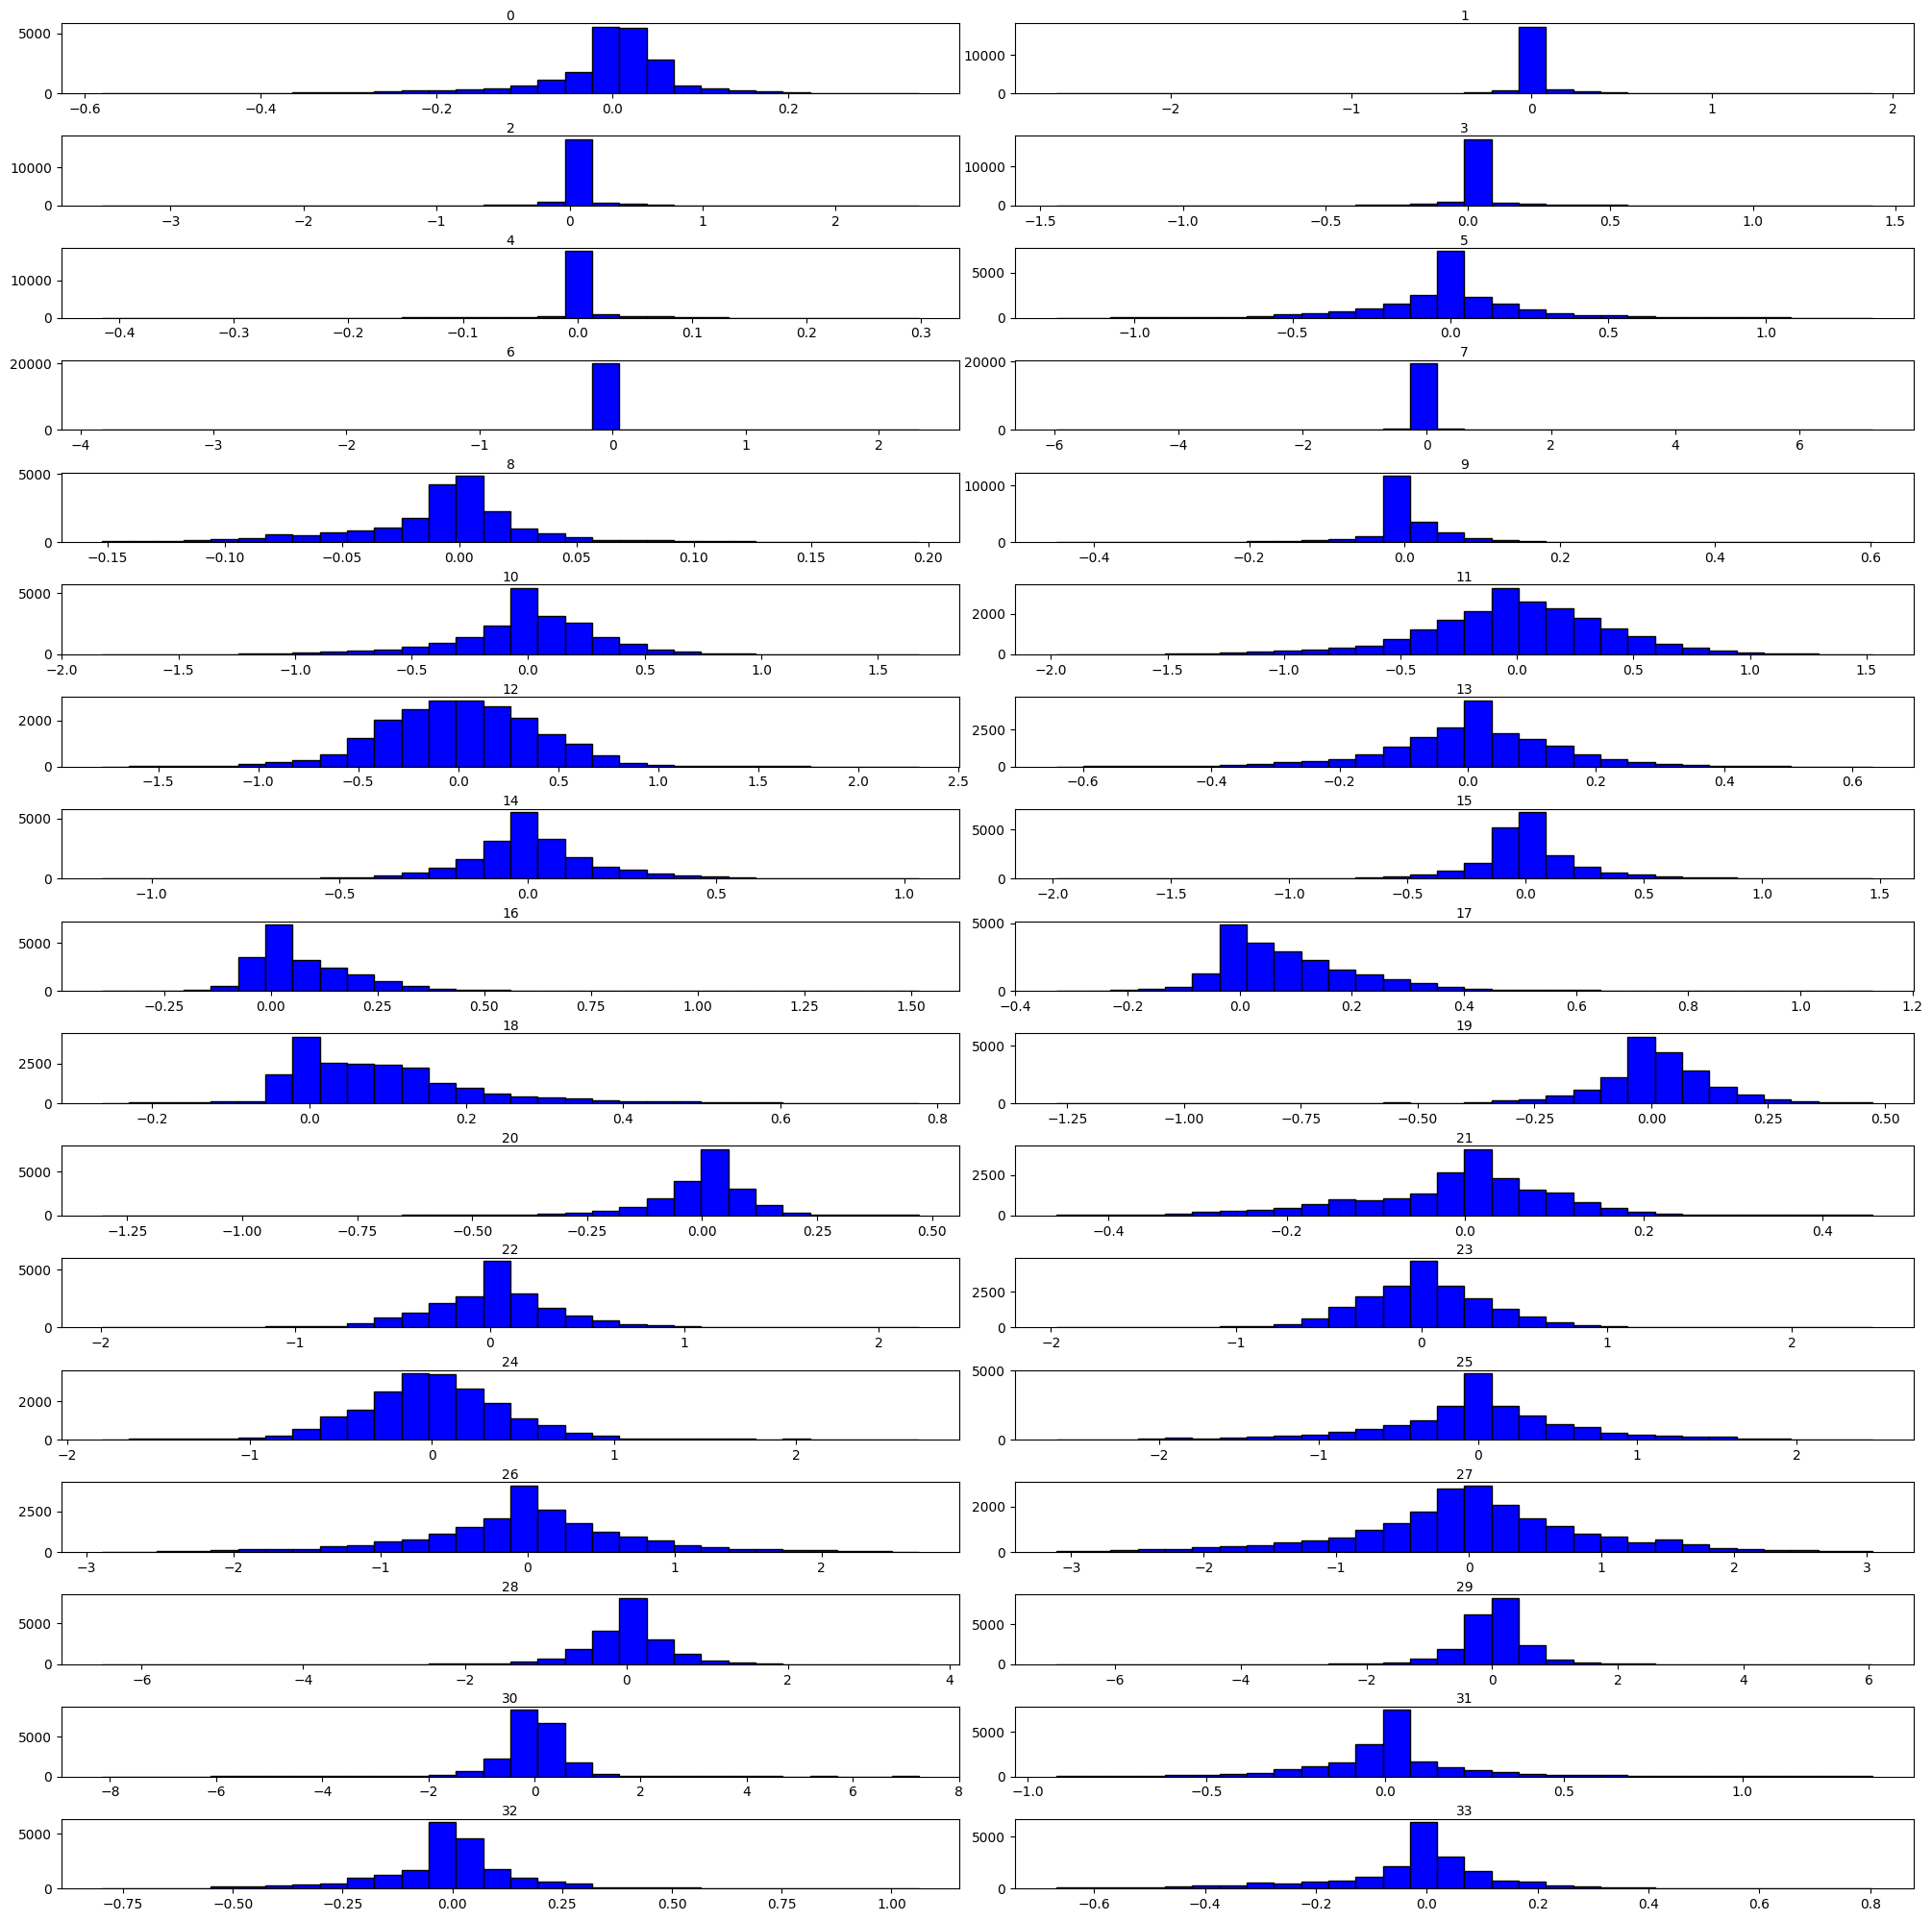

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(batch['state_surface'].shape[1]//2,2, figsize=(20, 20))
axes = axes.flatten()
fig.tight_layout()
for i in range (batch['state_surface'].shape[1]):
    axes[i].hist(batch['state_surface'][0,i].flatten(),color='blue',ec='black',bins=30)
    axes[i].text(0.5,1.05,f'{i}',ha="center", transform=axes[i].transAxes,)


In [15]:
test = torch.Tensor(batch['state_surface'])

In [25]:
test[0,:].reshape(34,-1).shape

torch.Size([34, 20592])

In [30]:
torch.quantile(test[0,:].reshape(34,-1),0.999,dim=1)

tensor([0.2257, 1.3089, 1.6837, 1.0393, 0.1312, 0.9555, 0.7760, 2.4070, 0.1854,
        0.3483, 1.1983, 1.2774, 1.6192, 0.4381, 0.7680, 1.2887, 0.9157, 0.8642,
        0.6284, 0.4455, 0.4546, 0.4344, 2.0697, 2.2735, 2.4556, 2.3553, 2.4811,
        2.9095, 2.8356, 2.8453, 3.3621, 1.2790, 1.0108, 0.7597])